In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('reviews.csv')
df

,headline,reviewBody,ratingValue
0,Super light and efficient laptop,Super light and efficient laptop. Crisp & cle...,5.0
1,NEW laptop is great,so far I am loving the new look and the feel o...,5.0
2,Lightweight powerhouse.,Great build quality \ excellent screen \ very ...,5.0
3,Great Laptop for Work,Excellent laptop for work. Processor was able ...,5.0
4,Practical Solid Laptop,"So far so good, I like it has an HDMI, USB-C &...",5.0
...,...,...,...
320,Dell Latitude 7440 Ultralight Review: A solid ...,Dell's Latitude 7440 Ultralight 2-in-1 impress...,NaN
321,Dell Latitude 7440 Ultralight Review: A solid ...,Dell's Latitude 7440 Ultralight 2-in-1 impress...,NaN
322,Dell Latitude 7440 Ultralight Review: A solid ...,Dell's Latitude 7440 Ultralight 2-in-1 impress...,NaN
323,Dell Latitude 7440 Ultralight Review: A solid ...,Dell's Latitude 7440 Ultralight 2-in-1 impress...,NaN


In [3]:
##--Checking null values 
df.isnull().sum()

headline       0
reviewBody     0
ratingValue    6
dtype: int64

In [4]:
##--Filling null values with zero
df.fillna(0, inplace=True)

In [5]:
df.describe()

,ratingValue
count,325.000000
mean,4.298462
std,1.227324
min,0.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 325 entries, 0 to 324
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   headline     325 non-null    object 
 1   reviewBody   325 non-null    object 
 2   ratingValue  325 non-null    float64
dtypes: float64(1), object(2)
memory usage: 7.7+ KB


In [7]:
##--Duplicated values
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
320     True
321     True
322     True
323     True
324     True
Length: 325, dtype: bool

In [8]:
###---printing Duplicated rows 
duplicated_rows = df[df.duplicated()]
print(duplicated_rows)

                                              headline  \
305                                       Great Device   
306                                       Great Laptop   
307                                       Great Device   
308                                       Great Laptop   
309                                       Great Device   
310                                       Great Laptop   
311                                       Great Device   
312                                       Great Laptop   
313                                       Great Device   
314                                       Great Laptop   
315                                       Great Device   
316                                       Great Laptop   
317                                       Great Device   
318                                       Great Laptop   
320  Dell Latitude 7440 Ultralight Review: A solid ...   
321  Dell Latitude 7440 Ultralight Review: A solid ...   
322  Dell Lati

In [9]:
df_no_duplicates = df.drop_duplicates()

In [10]:
##--Data cleaning
import re #regular expression
import string

def clean_text(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub("[0-9" "]+"," ",text)
    text = re.sub('[‘’“”…]', '', text)
    return text

In [11]:
clean_text = lambda x: x.lower()  # Example: converting text to lowercase
df['cleanedReviewBody'] = df['reviewBody'].apply(clean_text)
cleaned_df = pd.DataFrame(df)
print(cleaned_df.head())
df['ratingValue'] = df['ratingValue'].fillna(0)

                           headline  \
0  Super light and efficient laptop   
1               NEW laptop is great   
2           Lightweight powerhouse.   
3             Great Laptop for Work   
4            Practical Solid Laptop   

                                          reviewBody  ratingValue  \
0  Super light and efficient laptop.  Crisp & cle...          5.0   
1  so far I am loving the new look and the feel o...          5.0   
2  Great build quality \ excellent screen \ very ...          5.0   
3  Excellent laptop for work. Processor was able ...          5.0   
4  So far so good, I like it has an HDMI, USB-C &...          5.0   

                                   cleanedReviewBody  
0  super light and efficient laptop.  crisp & cle...  
1  so far i am loving the new look and the feel o...  
2  great build quality \ excellent screen \ very ...  
3  excellent laptop for work. processor was able ...  
4  so far so good, i like it has an hdmi, usb-c &...  


In [12]:
#Word frequency for head line
df['headline'] = df['headline'].fillna('').astype(str)
# Join all strings, split them into individual words, and get the top 20 most common words
freq = pd.Series(' '.join(df['headline']).split()).value_counts()[:20]
print(freq)

Great        60
7440         55
Latitude     45
and          41
laptop       37
Dell         36
Laptop       35
for          30
the          22
with         18
-            18
of           17
a            17
is           14
Good         14
Device       11
in           11
good         11
Nice         10
Excellent    10
dtype: int64


In [13]:
#Word frequency for reviewBody
df['reviewBody'] = df['reviewBody'].fillna('').astype(str)
# Join all strings, split them into individual words, and get the top 20 most common words
freq = pd.Series(' '.join(df['reviewBody']).split()).value_counts()[:20]
print(freq)

the       465
and       443
a         282
is        272
to        270
of        178
I         178
with      162
for       159
it        146
The       124
laptop    113
Dell       84
this       82
in         79
that       71
very       70
on         68
but        62
my         60
dtype: int64


In [14]:
#Word frequency for ratingValue
df['ratingValue'] = df['ratingValue'].fillna('').astype(str)
# Join all strings, split them into individual words, and get the top 20 most common words
freq = pd.Series(' '.join(df['ratingValue']).split()).value_counts()[:20]
print(freq)

5.0    210
4.0     64
3.0     18
1.0     17
2.0     10
0.0      6
dtype: int64


In [15]:
# count vectoriser tells the frequency of a word.
vectorizer = CountVectorizer(min_df=1, max_df=0.9)
X = vectorizer.fit_transform(df["reviewBody"])
word_freq_df = pd.DataFrame({
    'term': vectorizer.get_feature_names_out(),
    'occurrences': np.asarray(X.sum(axis=0)).ravel().tolist()
})
word_freq_df['frequency'] = word_freq_df['occurrences'] / np.sum(word_freq_df['occurrences'])

print(word_freq_df)

      term  occurrences  frequency
0       04            1   0.000095
1       10           11   0.001047
2      100            1   0.000095
3       11            4   0.000381
4      11p            1   0.000095
...    ...          ...        ...
1835   yet            9   0.000857
1836   you           32   0.003046
1837  your            6   0.000571
1838  zero            1   0.000095
1839  zoom            1   0.000095

[1840 rows x 3 columns]


In [16]:
#----N-Gram 
#Bi-gram
def get_top_n2_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(2,2),  #for tri-gram, put ngram_range=(3,3)
            max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]

In [17]:
###--Bi-gram --plot 
top2_words = get_top_n2_words(df["reviewBody"], n=200) #top 200
top2_df = pd.DataFrame(top2_words)
top2_df.columns=["Bi-gram", "Freq"]
top2_df.head()


,Bi-gram,Freq
0,of the,46
1,with the,42
2,the laptop,40
3,and the,39
4,this laptop,37


[Text(0, 0, 'of the'),
 Text(1, 0, 'with the'),
 Text(2, 0, 'the laptop'),
 Text(3, 0, 'and the'),
 Text(4, 0, 'this laptop'),
 Text(5, 0, 'it is'),
 Text(6, 0, 'on the'),
 Text(7, 0, 'laptop is'),
 Text(8, 0, 'love the'),
 Text(9, 0, 'latitude 7440'),
 Text(10, 0, 'the dell'),
 Text(11, 0, 'battery life'),
 Text(12, 0, 'the screen'),
 Text(13, 0, 'screen is'),
 Text(14, 0, 'for the'),
 Text(15, 0, 'easy to'),
 Text(16, 0, 'dell latitude'),
 Text(17, 0, 'the keyboard'),
 Text(18, 0, 'this is'),
 Text(19, 0, 'and it')]

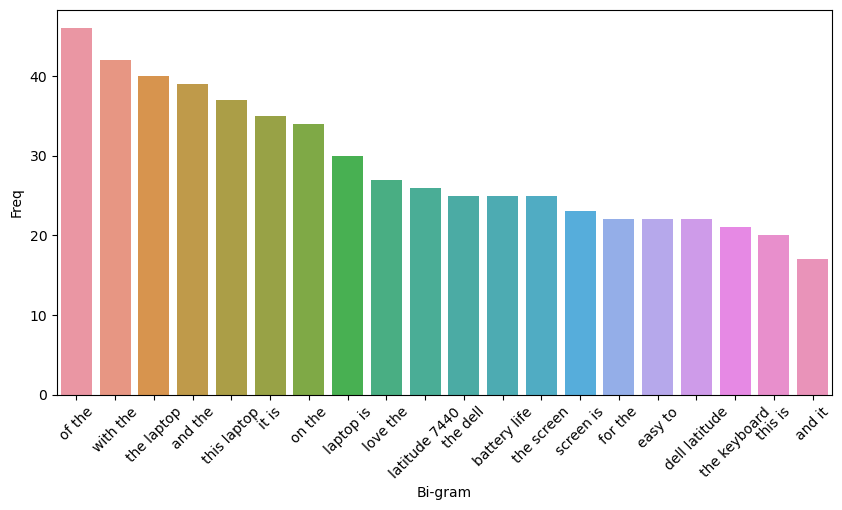

In [18]:


#Bi-gram plot
top20_bigram = top2_df.iloc[0:20,:]
fig = plt.figure(figsize = (10, 5))
plot=sns.barplot(x=top20_bigram["Bi-gram"],y=top20_bigram["Freq"])
plot.set_xticklabels(rotation=45,labels = top20_bigram["Bi-gram"])

In [19]:
#Tri-gram
def get_top_n3_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(3,3), 
           max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]

In [20]:
top3_words = get_top_n3_words(df["reviewBody"], n=200)
top3_df = pd.DataFrame(top3_words)
top3_df.columns=["Tri-gram", "Freq"]
top3_df

,Tri-gram,Freq
0,this laptop is,16
1,dell latitude 7440,15
2,the screen is,15
3,the dell latitude,14
4,32gb of ram,11
...,...,...
195,to work with,2
196,laptop for the,2
197,business and the,2
198,have been able,2


[Text(0, 0, 'this laptop is'),
 Text(1, 0, 'dell latitude 7440'),
 Text(2, 0, 'the screen is'),
 Text(3, 0, 'the dell latitude'),
 Text(4, 0, '32gb of ram'),
 Text(5, 0, 'and the screen'),
 Text(6, 0, 'and love the'),
 Text(7, 0, 'of the laptop'),
 Text(8, 0, 'to carry around'),
 Text(9, 0, 'makes big difference'),
 Text(10, 0, 'dell user for'),
 Text(11, 0, 'love the extra'),
 Text(12, 0, 'and easy to'),
 Text(13, 0, 'the latitude 7440'),
 Text(14, 0, 'great device the'),
 Text(15, 0, 'device the 32gb'),
 Text(16, 0, 'the 32gb of'),
 Text(17, 0, 'of ram makes'),
 Text(18, 0, 'ram makes big'),
 Text(19, 0, 'big difference love')]

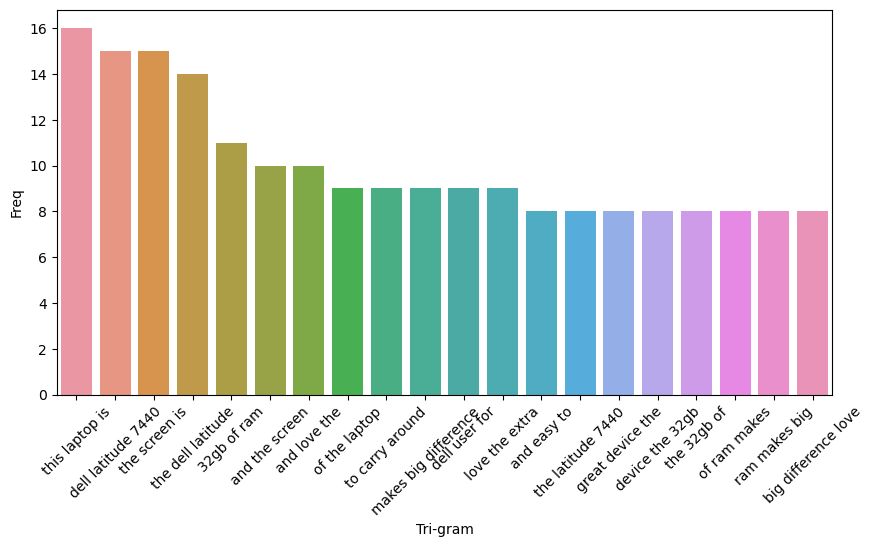

In [21]:
#Tri-gram plot
import seaborn as sns
top20_trigram = top3_df.iloc[0:20,:]
fig = plt.figure(figsize = (10, 5))
plot=sns.barplot(x=top20_trigram["Tri-gram"],y=top20_trigram["Freq"])
plot.set_xticklabels(rotation=45,labels = top20_trigram["Tri-gram"])

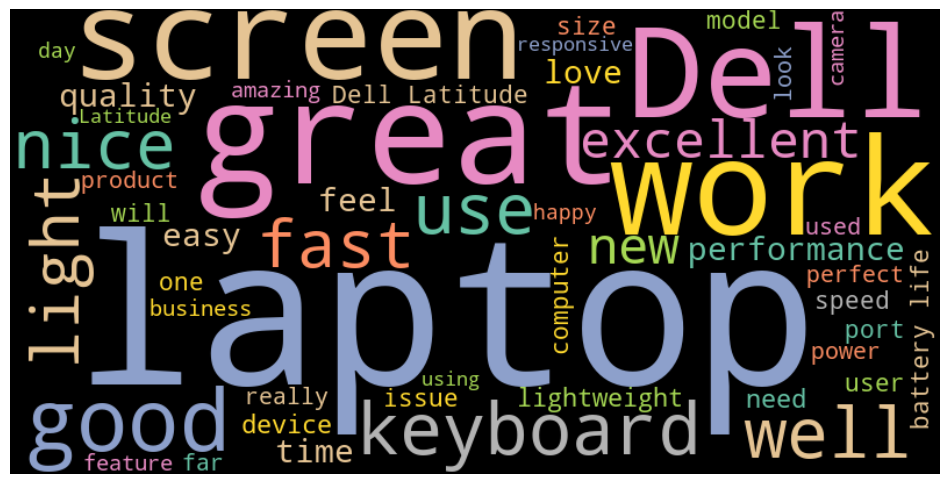

In [22]:
###---Word cloud 
from wordcloud import WordCloud, STOPWORDS
text = " ".join(review for review in df['reviewBody'])
def plot_cloud(wordcloud):
    plt.figure(figsize=(12, 12))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()
wordcloud = WordCloud(width=800, height=400, background_color='black', max_words=50,
                      colormap='Set2', stopwords=STOPWORDS).generate(text)
plot_cloud(wordcloud)

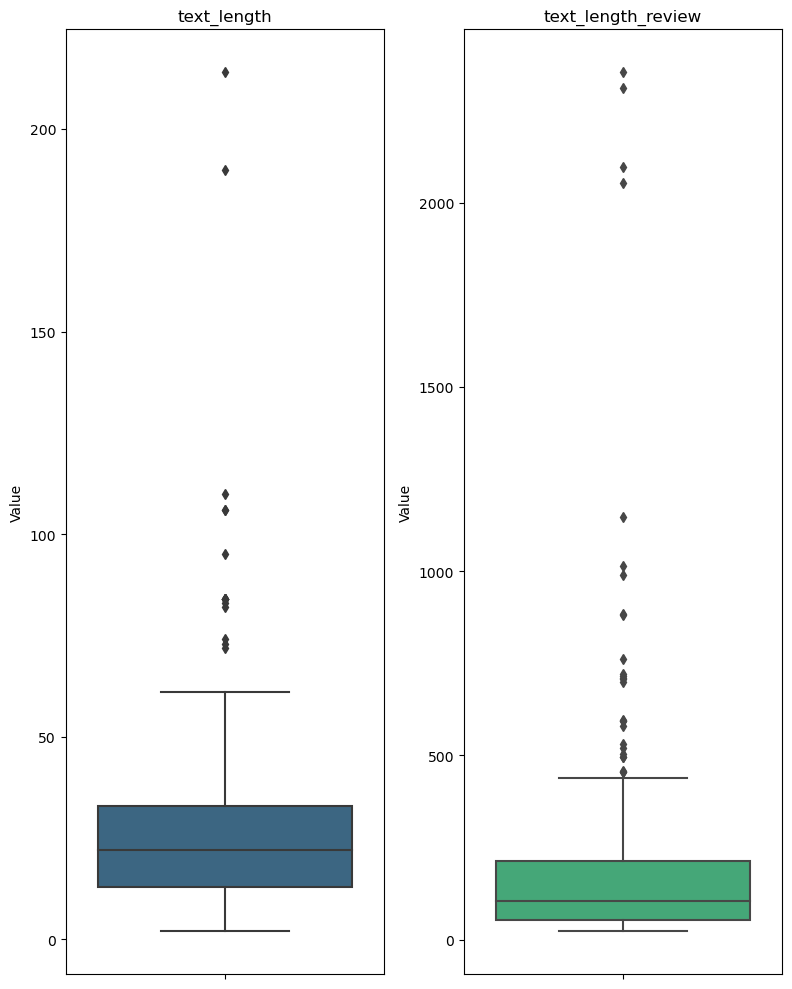

In [23]:
#---Box plot ----
df['text_length'] = df['headline'].apply(len)
df['text_length_review'] = df['reviewBody'].apply(len)
numeric_columns = df.select_dtypes(include='number').columns
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 10))
axes = axes.flatten()  # Flatten the 2D array of axes to easily iterate
colors = sns.color_palette('viridis', n_colors=len(numeric_columns))
for i, (variable, color) in enumerate(zip(numeric_columns, colors)):
    sns.boxplot(data=df, y=variable, ax=axes[i], color=color)
    axes[i].set_title(variable)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Value')
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])
plt.tight_layout()
plt.show()

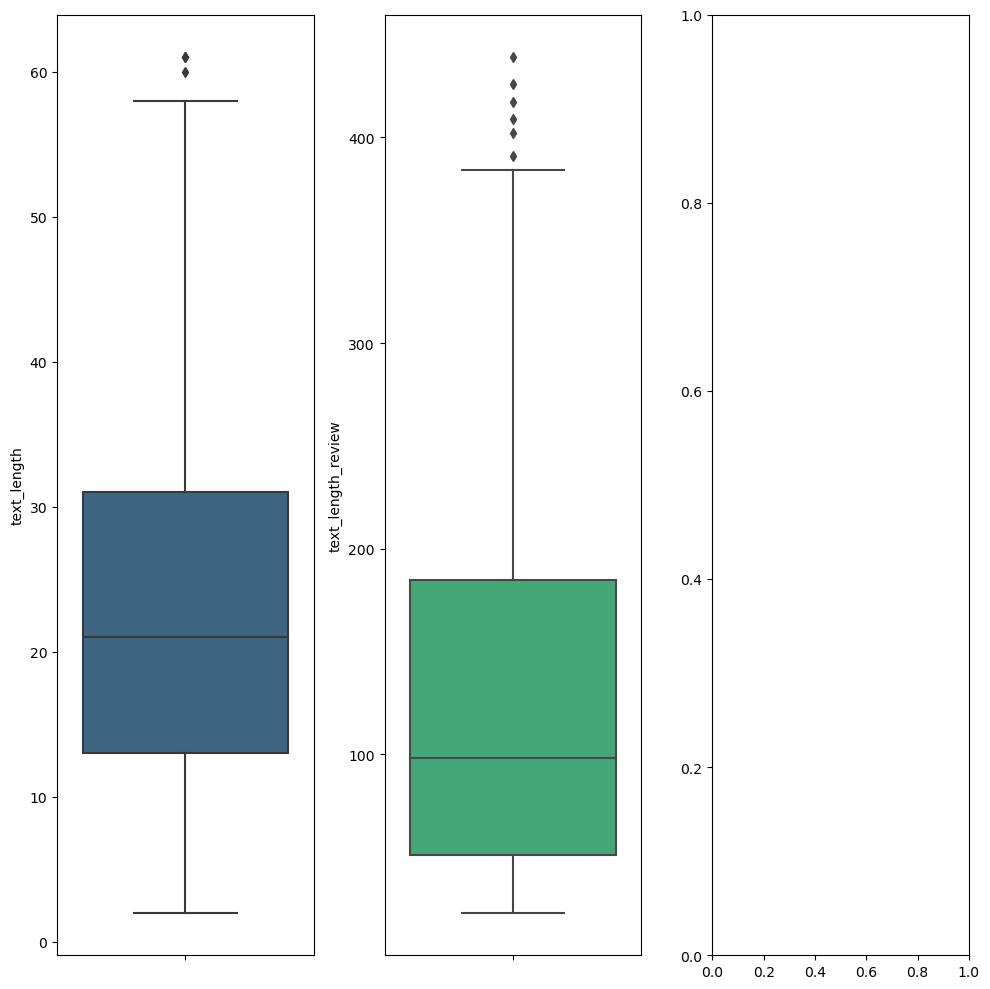

In [24]:
##--outliers---
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 10))
colors = sns.color_palette('viridis', n_colors=len(numeric_columns))
for i, (variable, color) in enumerate(zip(numeric_columns, colors)):
    Q1 = df[variable].quantile(0.25)
    Q3 = df[variable].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    df_filtered = df[(df[variable] >= lower_limit) & (df[variable] <= upper_limit)]
    sns.boxplot(data=df_filtered, y=variable, ax=axes[i], color=color)
plt.tight_layout()
plt.show()

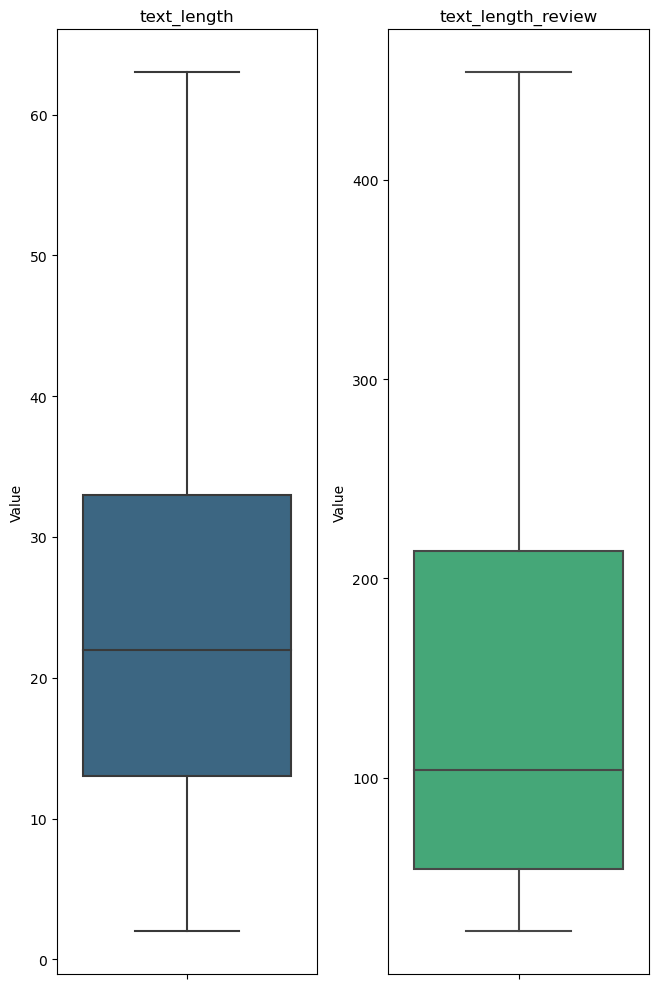

In [25]:
##--Capping for outliers 
numeric_columns = df.select_dtypes(include='number').columns
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 10))
axes = axes.flatten()  # Flatten the 2D array of axes to easily iterate
colors = sns.color_palette('viridis', n_colors=len(numeric_columns))
for i, (variable, color) in enumerate(zip(numeric_columns, colors)):
    Q1 = df[variable].quantile(0.25)
    Q3 = df[variable].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    df_capped = df.copy()
    df_capped[variable] = df_capped[variable].clip(lower_limit, upper_limit)
    sns.boxplot(data=df_capped, y=variable, ax=axes[i], color=color)
    axes[i].set_title(variable)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Value')
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])
plt.tight_layout()
plt.show()

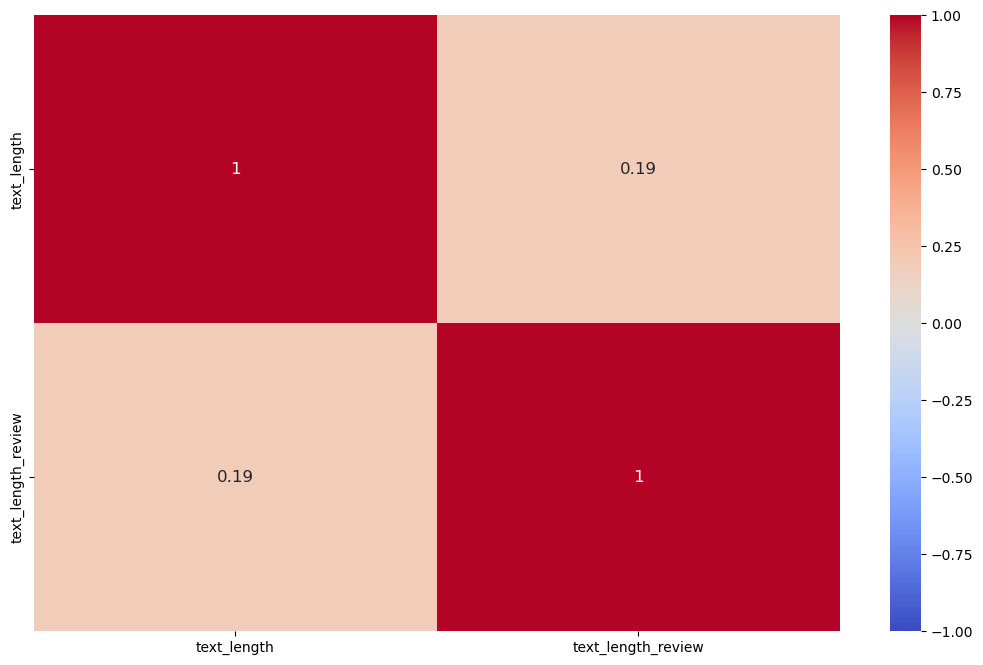

In [26]:
###---Heat map
plt.figure(figsize=(13,8))
sns.heatmap(df.corr(), cmap='coolwarm', vmin=-1, vmax=1, annot=True, annot_kws={'fontsize':12})
plt.show()

In [27]:
##---Merging columns 
# Merge the 'headline' and 'reviewBody' columns into a new column 'mergedReview'
df['mergedReview'] = df['headline'] + ". " + df['reviewBody']

In [28]:

# Display the first few rows of the updated dataset
df[['headline', 'reviewBody', 'mergedReview']].head()
df['mergedReview']

0      Super light and efficient laptop. Super light ...
1      NEW laptop is great. so far I am loving the ne...
2      Lightweight powerhouse.. Great build quality \...
3      Great Laptop for Work. Excellent laptop for wo...
4      Practical Solid Laptop. So far so good, I like...
                             ...                        
320    Dell Latitude 7440 Ultralight Review: A solid ...
321    Dell Latitude 7440 Ultralight Review: A solid ...
322    Dell Latitude 7440 Ultralight Review: A solid ...
323    Dell Latitude 7440 Ultralight Review: A solid ...
324    Dell Latitude 7440 Ultralight Review: A solid ...
Name: mergedReview, Length: 325, dtype: object

In [29]:
#Word frequency for mergedReview
df['mergedReview'] = df['mergedReview'].fillna('').astype(str)
# Join all strings, split them into individual words, and get the top 20 most common words
freq = pd.Series(' '.join(df['mergedReview']).split()).value_counts()[:20]
print(freq)

the         487
and         484
a           299
is          286
to          278
of          195
for         189
I           181
with        180
it          150
The         133
laptop      131
Dell        119
Great        94
Latitude     93
in           89
this         85
7440         83
that         73
very         73
dtype: int64


In [30]:
###--- Sentiment Analysis
from nltk import tokenize
text = ' '.join(df['mergedReview'])
# Tokenize the text into sentences
sentences = tokenize.sent_tokenize(text)
sentences

['Super light and efficient laptop.',
 'Super light and efficient laptop.',
 'Crisp & clean screen and easier to handle.',
 'Very fast execution of apps and programs NEW laptop is great.',
 'so far I am loving the new look and the feel of the new laptop Lightweight powerhouse.. Great build quality \\ excellent screen \\ very good port options.',
 'Keyboard if quality and comfortable to type on the trackpad feels responsive and accurate.',
 'The weight of this laptop is outstanding perfect for the daily work commute.',
 'Great Laptop for Work.',
 'Excellent laptop for work.',
 'Processor was able to handle my workload better than my current laptop.',
 'Practical Solid Laptop.',
 'So far so good, I like it has an HDMI, USB-C & A ports instead of all USB-C ports.',
 'The power adapter is lighter than I was expecting.',
 'laptop is a good size and weight.',
 'Screen image looks sharp.',
 'Will be using it for work/travel I think it will work out great.',
 'Good Choice.',
 'Very light weigh

In [31]:
sent_df=pd.DataFrame(sentences,columns=['sentence'])
sent_df

,sentence
0,Super light and efficient laptop.
1,Super light and efficient laptop.
2,Crisp & clean screen and easier to handle.
3,Very fast execution of apps and programs NEW l...
4,so far I am loving the new look and the feel o...
...,...
1111,Dell's Latitude 7440 Ultralight 2-in-1 impress...
1112,Its competitive pricing adds to its overall ap...
1113,Dell Latitude 7440 Ultralight Review: A solid ...
1114,Dell's Latitude 7440 Ultralight 2-in-1 impress...


In [32]:
# how many words are there in a sentence?
sent_df['word_count']=sent_df['sentence'].str.split().apply(len)
sent_df['word_count']

0        5
1        5
2        8
3       11
4       28
        ..
1111    29
1112    13
1113    12
1114    29
1115    13
Name: word_count, Length: 1116, dtype: int64

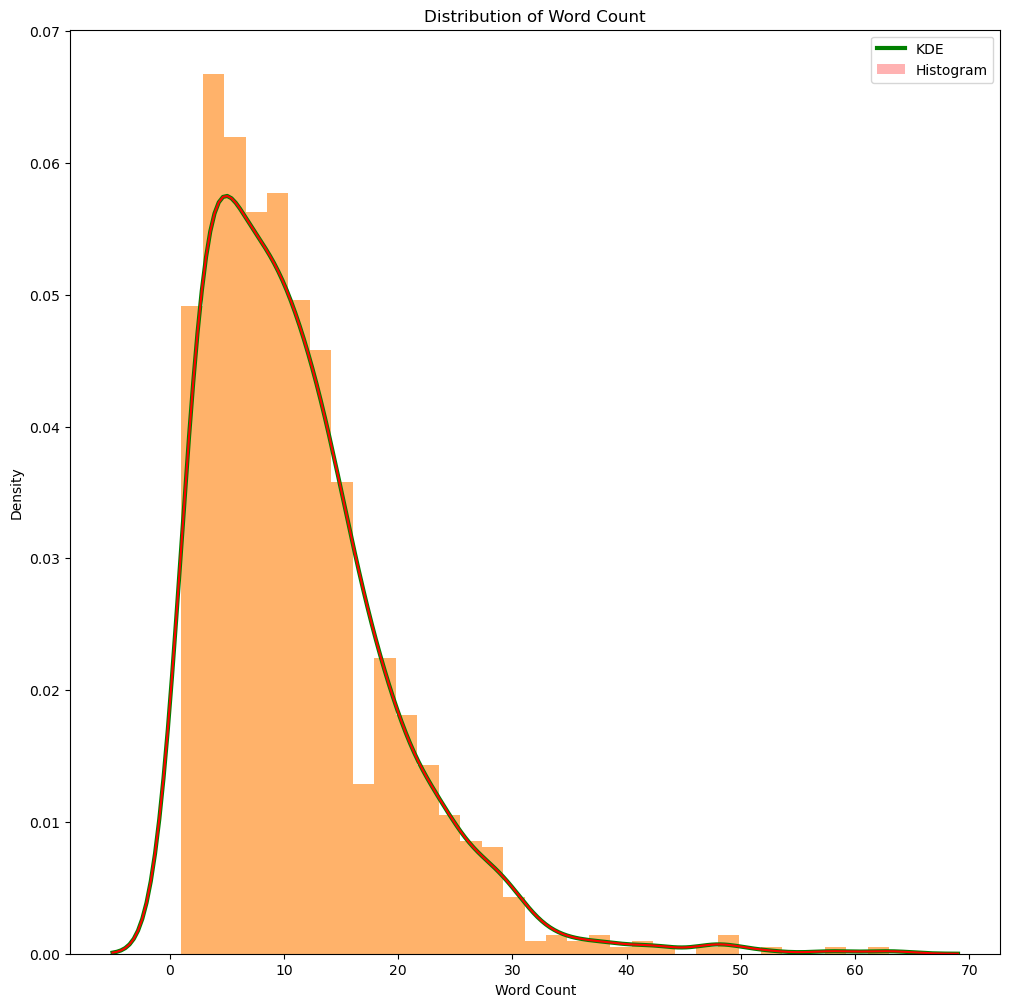

In [33]:
###--- Distribution plot for word count 
plt.figure(figsize=(12, 12))
sns.distplot(sent_df['word_count'], color='yellow', kde_kws={'color': 'green', 'lw': 3, 'label': 'KDE'})
sns.distplot(sent_df['word_count'], color='red', hist_kws={'alpha': 0.3, 'histtype': 'stepfilled', 'linewidth': 3, 'label': 'Histogram'})
plt.xlabel('Word Count')
plt.ylabel('Density')
plt.title('Distribution of Word Count')
plt.legend()
plt.show()


In [34]:
from itertools import islice
def take(n, iterable):
    "Return first n items of the iterable as a list"
    return list(islice(iterable, n))

In [35]:
##--Affinity scores 
from collections import defaultdict
sent_df = df[['mergedReview', 'ratingValue']].copy()
sent_df = sent_df.dropna(subset=['mergedReview', 'ratingValue'])
sent_df['mergedReview'] = sent_df['mergedReview'].astype(str)
affinity_scores = defaultdict(list)
for index, row in sent_df.iterrows():
    words = row['mergedReview'].split()
    for word in words:
        affinity_scores[word].append(row['ratingValue'])
print(dict(affinity_scores))
affinity_scores_dict = dict(affinity_scores)
print(affinity_scores)

{'Super': ['5.0', '5.0', '5.0', '5.0', '5.0', '5.0', '4.0'], 'light': ['5.0', '5.0', '5.0', '5.0', '5.0', '5.0', '5.0', '5.0', '5.0', '5.0', '5.0', '5.0', '5.0', '5.0', '5.0', '5.0', '5.0', '5.0', '5.0', '5.0', '5.0', '5.0', '5.0', '5.0', '5.0', '5.0', '5.0', '5.0', '5.0', '5.0', '5.0', '5.0', '5.0', '4.0', '4.0', '4.0', '4.0', '4.0'], 'and': ['5.0', '5.0', '5.0', '5.0', '5.0', '5.0', '5.0', '5.0', '5.0', '5.0', '5.0', '5.0', '5.0', '5.0', '5.0', '5.0', '5.0', '5.0', '5.0', '5.0', '5.0', '5.0', '5.0', '5.0', '5.0', '5.0', '5.0', '5.0', '5.0', '5.0', '5.0', '5.0', '5.0', '5.0', '5.0', '5.0', '5.0', '5.0', '5.0', '5.0', '5.0', '5.0', '5.0', '5.0', '5.0', '5.0', '5.0', '5.0', '5.0', '5.0', '5.0', '5.0', '5.0', '5.0', '5.0', '5.0', '5.0', '5.0', '5.0', '5.0', '5.0', '5.0', '5.0', '5.0', '5.0', '5.0', '5.0', '5.0', '5.0', '5.0', '5.0', '5.0', '5.0', '5.0', '5.0', '5.0', '5.0', '5.0', '5.0', '5.0', '5.0', '5.0', '5.0', '5.0', '5.0', '5.0', '5.0', '5.0', '5.0', '5.0', '5.0', '5.0', '5.0', '5.

In [36]:
import spacy
nlp = spacy.load('en_core_web_sm')
sentiment_lexicon = affinity_scores

In [37]:
def calculate_sentiment(data: str = None) -> float:
    sent_score = 0
    if data:
        sentence = nlp(data)
        for word in sentence:
            sent_score += sentiment_lexicon.get(word.lemma_, 0)
    return sent_score

In [38]:
# Classify sentiment based on 'ratingValue'
sent_df = df[['mergedReview', 'ratingValue']].copy()
sent_df['ratingValue'] = pd.to_numeric(sent_df['ratingValue'], errors='coerce')
sent_df = sent_df.dropna(subset=['ratingValue'])


In [39]:
result = []
for value in sent_df['ratingValue']:
    if value < 3:
        result.append("Negative")
    elif value == 3:
        result.append("Neutral")
    elif value > 3:
        result.append("Positive")
sent_df["sentiment"] = result

print(sent_df)

                                          mergedReview  ratingValue sentiment
0    Super light and efficient laptop. Super light ...          5.0  Positive
1    NEW laptop is great. so far I am loving the ne...          5.0  Positive
2    Lightweight powerhouse.. Great build quality \...          5.0  Positive
3    Great Laptop for Work. Excellent laptop for wo...          5.0  Positive
4    Practical Solid Laptop. So far so good, I like...          5.0  Positive
..                                                 ...          ...       ...
320  Dell Latitude 7440 Ultralight Review: A solid ...          0.0  Negative
321  Dell Latitude 7440 Ultralight Review: A solid ...          0.0  Negative
322  Dell Latitude 7440 Ultralight Review: A solid ...          0.0  Negative
323  Dell Latitude 7440 Ultralight Review: A solid ...          0.0  Negative
324  Dell Latitude 7440 Ultralight Review: A solid ...          0.0  Negative

[325 rows x 3 columns]


In [40]:
sent_df.head(50)

,mergedReview,ratingValue,sentiment
0,Super light and efficient laptop. Super light ...,5.0,Positive
1,NEW laptop is great. so far I am loving the ne...,5.0,Positive
2,Lightweight powerhouse.. Great build quality \...,5.0,Positive
3,Great Laptop for Work. Excellent laptop for wo...,5.0,Positive
4,"Practical Solid Laptop. So far so good, I like...",5.0,Positive
5,Good Choice. Very light weight and like the to...,5.0,Positive
6,"Like the laptop. Really like the laptop, it is...",5.0,Positive
7,"A great, portable laptop.. An excellent all-ar...",5.0,Positive
8,Feels like QUALITY! fast!. Feels like quality!...,5.0,Positive
9,The Best Laptop!. Upgraded from Latitude 5440 ...,5.0,Positive


In [41]:
sent_df.tail(50)

,mergedReview,ratingValue,sentiment
275,So so experience with intial use.. I had all s...,3.0,Neutral
276,BIOS Problem. I needed to use an external keyb...,3.0,Neutral
277,"Nice laptop, Windows software kept crashing. S...",3.0,Neutral
278,"lightweight and powerful, but does not play ni...",2.0,Negative
279,No EVO Framework. I purchased this laptop for ...,2.0,Negative
280,The device was faulty and facing issues in usa...,2.0,Negative
281,Waste Of Money. Worst Screen Quality ever on a...,2.0,Negative
282,Dell latitude-14-7440-2-in-1-laptop. Significa...,2.0,Negative
283,Too slow!. Waited 5 weeks for the computer. Wa...,2.0,Negative
284,Solid Corporate device. This is a great perfor...,2.0,Negative


In [42]:
sentiment_counts = sent_df["sentiment"].value_counts()
print(sentiment_counts)

Positive    274
Negative     33
Neutral      18
Name: sentiment, dtype: int64


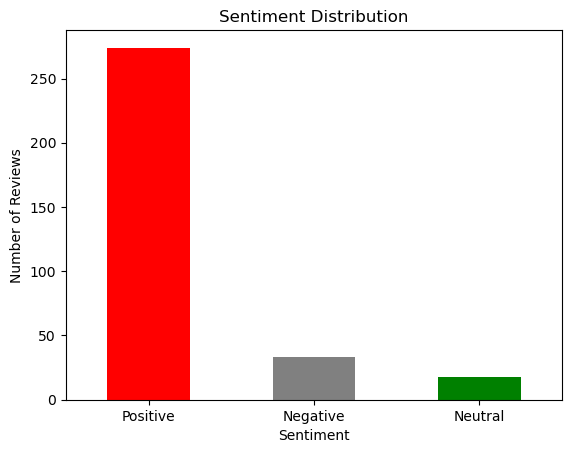

In [43]:
##---Count plot for Sentiment Distribution
sentiment_counts.plot(kind='bar', color=['red', 'gray', 'green'])
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.title('Sentiment Distribution')
plt.xticks(rotation=0)
plt.show()

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score

In [45]:
df['mergedReview'] = df['headline'].fillna('') + ". " + df['cleanedReviewBody']

In [46]:
# Drop missing values
df = df.dropna(subset=['mergedReview', 'ratingValue'])

In [47]:
# Encode sentiment
df['ratingValue'] = pd.to_numeric(df['ratingValue'], errors='coerce')
df = df.dropna(subset=['ratingValue'])
df['sentiment'] = df['ratingValue'].apply(lambda x: 'Negative' if x < 3 else ('Neutral' if x == 3 else 'Positive'))

In [48]:
# Feature extraction
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['mergedReview'])
y = df['sentiment']

In [49]:
# Split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [50]:

# Dictionary to store the models and their results
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Support Vector Machine": SVC(),
    "Naive Bayes": MultinomialNB(),
    "Random Forest": RandomForestClassifier(n_estimators=100)
}

In [51]:
# Function to train and evaluate models
def evaluate_models(models, X_train, X_test, y_train, y_test):
    results = {}
    for model_name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='weighted')
        recall = recall_score(y_test, y_pred, average='weighted')
        f1 = f1_score(y_test, y_pred, average='weighted')
        results[model_name] = {
            "Accuracy": accuracy,
            "Precision": precision,
            "Recall": recall,
            "F1 Score": f1,
            "Classification Report": classification_report(y_test, y_pred),
            "Confusion Matrix": confusion_matrix(y_test, y_pred)
        }
    return results

In [52]:
# Evaluate models
results = evaluate_models(models, X_train, X_test, y_train, y_test)


In [53]:
# Print results
for model_name, metrics in results.items():
    print(f"Model: {model_name}")
    print(f"Accuracy: {metrics['Accuracy']}")
    print(f"Precision: {metrics['Precision']}")
    print(f"Recall: {metrics['Recall']}")
    print(f"F1 Score: {metrics['F1 Score']}")
    print(f"Classification Report:\n{metrics['Classification Report']}")
    print(f"Confusion Matrix:\n{metrics['Confusion Matrix']}")
    print("\n")


Model: Logistic Regression
Accuracy: 0.8769230769230769
Precision: 0.8771672771672773
Recall: 0.8769230769230769
F1 Score: 0.8391371340523883
Classification Report:
              precision    recall  f1-score   support

    Negative       1.00      0.22      0.36         9
     Neutral       0.00      0.00      0.00         1
    Positive       0.87      1.00      0.93        55

    accuracy                           0.88        65
   macro avg       0.62      0.41      0.43        65
weighted avg       0.88      0.88      0.84        65

Confusion Matrix:
[[ 2  0  7]
 [ 0  0  1]
 [ 0  0 55]]


Model: Support Vector Machine
Accuracy: 0.8769230769230769
Precision: 0.8771672771672773
Recall: 0.8769230769230769
F1 Score: 0.8391371340523883
Classification Report:
              precision    recall  f1-score   support

    Negative       1.00      0.22      0.36         9
     Neutral       0.00      0.00      0.00         1
    Positive       0.87      1.00      0.93        55

    accurac

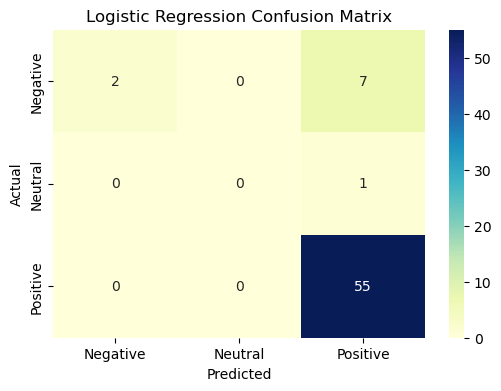

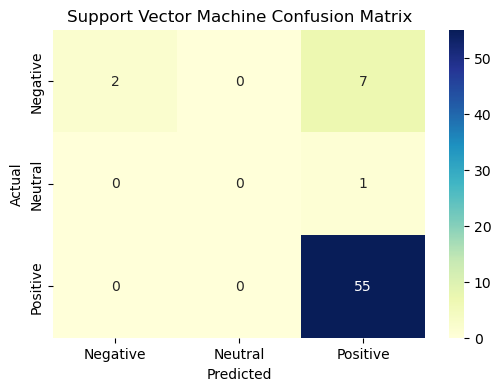

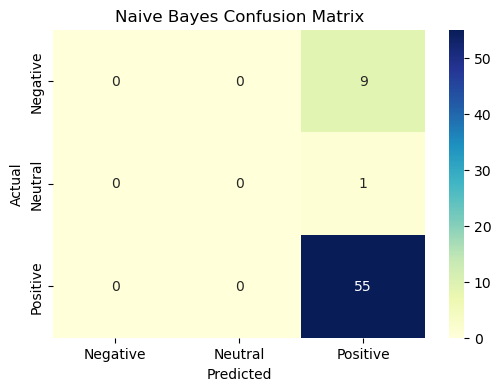

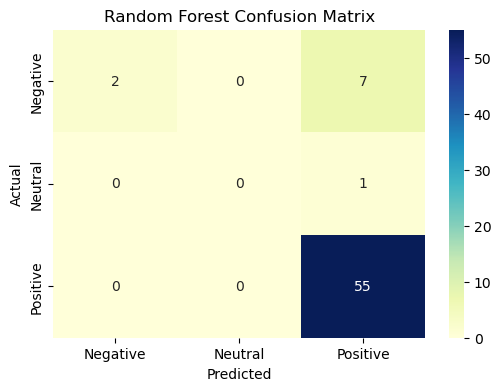

In [54]:
# Plot confusion matrix for each model
for model_name, metrics in results.items():
    plt.figure(figsize=(6,4))
    sns.heatmap(metrics['Confusion Matrix'], annot=True, fmt='d', cmap='YlGnBu', xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
    plt.title(f'{model_name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()